# ML Textual model Feature Engineering

In [1]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.preprocessing import LabelEncoder

# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

### Reading CSV file using pandas dataframe

In [3]:
dataset = pd.read_csv("patient data all 119.csv")
df_clean = dataset.drop(columns=["seq_id", "patient_id", "date" , "cough_filename", "finger_filename",
                                "patient_smartphone", "breathing_filename"])
# df_clean
# df_clean = df_clean.head(1)
df_clean

,corona_test,age,gender,medical_history,smoker,patient_reported_symptoms
0,negative,32,male,NaN,NaN,"Fever, chills, or sweating,"
1,negative,31,male,NaN,NaN,"Fever, chills, or sweating,Shortness of breath..."
2,negative,21,female,NaN,NaN,"New or worsening cough,"
3,negative,33,male,"Asthma or chronic lung disease,",NaN,"Fever, chills, or sweating,Shortness of breath..."
4,negative,27,male,Disease or conditions that make it harder to c...,NaN,"New or worsening cough,"
...,...,...,...,...,...,...
113,positive,50,male,"None,",no,"None,"
114,negative,26,male,"None,",no,"Shortness of breath,New or worsening cough,Sor..."
115,negative,50,male,"None,",yes,"New or worsening cough,Sore throat,"
116,negative,44,male,"None,",no,"Shortness of breath,New or worsening cough,Sor..."


### Counting number of nan values in each feature

In [4]:
ff = df_clean["medical_history"].isna().sum()
print(ff)

# Filling nan values with None.
df_clean["medical_history"].fillna("None,", inplace = True) 
df_clean["smoker"].fillna("no", inplace = True) 
df_clean["patient_reported_symptoms"].fillna("None,", inplace = True) 

3


In [5]:
df_clean.head()

,corona_test,age,gender,medical_history,smoker,patient_reported_symptoms
0,negative,32,male,"None,",no,"Fever, chills, or sweating,"
1,negative,31,male,"None,",no,"Fever, chills, or sweating,Shortness of breath..."
2,negative,21,female,"None,",no,"New or worsening cough,"
3,negative,33,male,"Asthma or chronic lung disease,",no,"Fever, chills, or sweating,Shortness of breath..."
4,negative,27,male,Disease or conditions that make it harder to c...,no,"New or worsening cough,"


In [6]:
# In order to see how many unique values are there in my column
df_clean["medical_history"].describe()

count       118
unique        9
top       None,
freq         84
Name: medical_history, dtype: object

### Histogram

<Figure size 432x288 with 0 Axes>

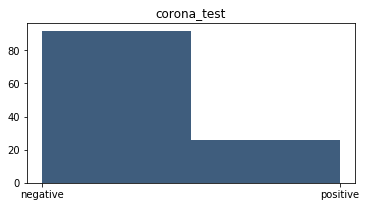

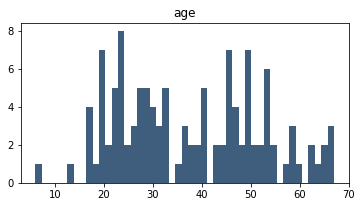

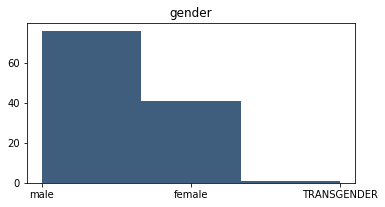

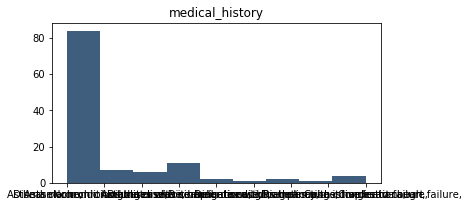

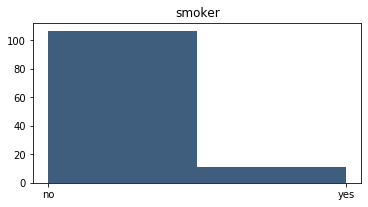

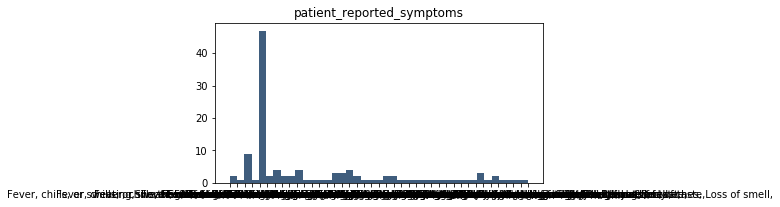

In [7]:
plt.suptitle("Histogram of Numerical Columns", fontsize = 20)
for i in range(1, df_clean.shape[1]+ 1): 
    plt.figure(figsize=(20,10))
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(df_clean.columns.values[i - 1])
    vals = np.size(df_clean.iloc[:, i - 1].unique())
    plt.hist(df_clean.iloc[:, i - 1], bins = vals, color = "#3F5D7D")

# Correlation

In [8]:
# TODO: Not working properly

# df_clean.corrwith(df_clean.corona_test).plot.bar(figsize = (20, 10),
#                                                 title= "Correlation With Responsive Variable", 
#                                                 fontsize = 15, rot = 45,
#                                                 grid = True)
# corr = df_clean.corr()
# ax = sns.heatmap(
#     corr, 
#     vmin=-1, vmax=1, center=0,
#     cmap=sns.diverging_palette(20, 220, n=200),
#     square=True
# )
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# );

In [9]:
# For checking the data type of all the features
df_clean.dtypes

corona_test                  object
age                           int64
gender                       object
medical_history              object
smoker                       object
patient_reported_symptoms    object
dtype: object

In [10]:
# For checking how many unique rows in medical history.
df_clean["medical_history"].unique()

array(['None,', 'Asthma or chronic lung disease,',
       'Disease or conditions that make it harder to cough,',
       'Diabetes with complications,',
       'Asthma or chronic lung disease,Disease or conditions that make it harder to cough,',
       'Asthma or chronic lung disease,Diabetes with complications,',
       'Pregnancy,',
       'Diabetes with complications,Congestive heart failure,',
       'Congestive heart failure,'], dtype=object)

### reading csv containing important medical history diseases

In [11]:
top_medical_history = ['None,', 'Asthma or chronic lung disease,',
       'Disease or conditions that make it harder to cough,',
       'Diabetes with complications,', 'Pregnancy,',
       'Congestive heart failure,', 'Extreme obesity']
top_medical_history

['None,',
 'Asthma or chronic lung disease,',
 'Disease or conditions that make it harder to cough,',
 'Diabetes with complications,',
 'Pregnancy,',
 'Congestive heart failure,',
 'Extreme obesity']

### doing feature engineering on medical history

In [12]:
# one hot encoding
df2 = df_clean.copy()
for mh in top_medical_history:
    df2[mh] = df2.medical_history.str.contains(mh).astype(int)
    df2["medical_history"] = df2.medical_history.str.replace(mh+ ",", "")

df2["total_diseases"] = df2.medical_history.str.count(",")
df2 = df2.drop(columns = ["medical_history", "patient_reported_symptoms"])
df2

,corona_test,age,gender,smoker,"None,","Asthma or chronic lung disease,","Disease or conditions that make it harder to cough,","Diabetes with complications,","Pregnancy,","Congestive heart failure,",Extreme obesity,total_diseases
0,negative,32,male,no,1,0,0,0,0,0,0,1
1,negative,31,male,no,1,0,0,0,0,0,0,1
2,negative,21,female,no,1,0,0,0,0,0,0,1
3,negative,33,male,no,0,1,0,0,0,0,0,1
4,negative,27,male,no,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
113,positive,50,male,no,1,0,0,0,0,0,0,1
114,negative,26,male,no,1,0,0,0,0,0,0,1
115,negative,50,male,yes,1,0,0,0,0,0,0,1
116,negative,44,male,no,1,0,0,0,0,0,0,1


# Doing feature engineering on reported Symptoms

In [13]:
# For checking how many unique rows in patient_reported_symptoms.
# df_clean["patient_reported_symptoms"].unique()

In [14]:
# reading csv_file of patient recorded symptoms
top_symptoms = ['Fever,', 'chills,', 'or sweating,', 'Shortness of breath',
       'Loss of taste,', 'Loss of smell,', 'New or worsening cough,',
       'Sore throat,', 'Body aches,', 'None,']
top_symptoms

['Fever,',
 'chills,',
 'or sweating,',
 'Shortness of breath',
 'Loss of taste,',
 'Loss of smell,',
 'New or worsening cough,',
 'Sore throat,',
 'Body aches,',
 'None,']

#### Breaking every symptom into a feature

In [15]:
df3 = df_clean.copy()
for ps in top_symptoms:
    df3[ps] = df_clean.patient_reported_symptoms.str.contains(ps).astype(int)
    df3["patient_reported_symptoms"] = df_clean.patient_reported_symptoms.str.replace(ps+ ",", "")

df3["total symptoms"] = df_clean.patient_reported_symptoms.str.count(",")
df3 = df3.drop(columns = ["patient_reported_symptoms", "medical_history", "corona_test", "age", "gender", "smoker"])

df3.rename(columns={'None,':'Nothing'}, 
                 inplace=True)
df3

,"Fever,","chills,","or sweating,",Shortness of breath,"Loss of taste,","Loss of smell,","New or worsening cough,","Sore throat,","Body aches,",Nothing,total symptoms
0,1,1,1,0,0,0,0,0,0,0,3
1,1,1,1,1,1,1,0,0,0,0,6
2,0,0,0,0,0,0,1,0,0,0,1
3,1,1,1,1,1,1,1,0,0,0,7
4,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
113,0,0,0,0,0,0,0,0,0,1,1
114,0,0,0,1,1,0,1,1,1,0,5
115,0,0,0,0,0,0,1,1,0,0,2
116,0,0,0,1,0,0,1,1,1,0,4


##### Here we are merging the dataframes based on these features

In [16]:
df4 = pd.concat([df2, df3], axis=1, ignore_index=False)
# here you can drop total symptoms and total diseases column as well, in order to make your algo more robust
df4 = df4.drop(columns = ["total_diseases", "total symptoms"])
df4

,corona_test,age,gender,smoker,"None,","Asthma or chronic lung disease,","Disease or conditions that make it harder to cough,","Diabetes with complications,","Pregnancy,","Congestive heart failure,",...,"Fever,","chills,","or sweating,",Shortness of breath,"Loss of taste,","Loss of smell,","New or worsening cough,","Sore throat,","Body aches,",Nothing
0,negative,32,male,no,1,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
1,negative,31,male,no,1,0,0,0,0,0,...,1,1,1,1,1,1,0,0,0,0
2,negative,21,female,no,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,negative,33,male,no,0,1,0,0,0,0,...,1,1,1,1,1,1,1,0,0,0
4,negative,27,male,no,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,positive,50,male,no,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
114,negative,26,male,no,1,0,0,0,0,0,...,0,0,0,1,1,0,1,1,1,0
115,negative,50,male,yes,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
116,negative,44,male,no,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,1,0


In [17]:
# for visualizing statistical detail of dataframe.
df4.describe()

,age,"None,","Asthma or chronic lung disease,","Disease or conditions that make it harder to cough,","Diabetes with complications,","Pregnancy,","Congestive heart failure,",Extreme obesity,"Fever,","chills,","or sweating,",Shortness of breath,"Loss of taste,","Loss of smell,","New or worsening cough,","Sore throat,","Body aches,",Nothing
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.0,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,37.677966,0.711864,0.084746,0.067797,0.110169,0.016949,0.042373,0.0,0.245763,0.245763,0.245763,0.313559,0.177966,0.084746,0.381356,0.296610,0.110169,0.398305
std,14.503687,0.454826,0.279691,0.252469,0.314436,0.129631,0.202297,0.0,0.432374,0.432374,0.432374,0.465918,0.384115,0.279691,0.487791,0.458711,0.314436,0.491637
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,67.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
df4.dtypes

corona_test                                            object
age                                                     int64
gender                                                 object
smoker                                                 object
None,                                                   int64
Asthma or chronic lung disease,                         int64
Disease or conditions that make it harder to cough,     int64
Diabetes with complications,                            int64
Pregnancy,                                              int64
Congestive heart failure,                               int64
Extreme obesity                                         int64
Fever,                                                  int64
chills,                                                 int64
or sweating,                                            int64
Shortness of breath                                     int64
Loss of taste,                                          int64
Loss of 

In [19]:
# for checking total no of nan values in dataset.
df4.isna().sum()

corona_test                                            0
age                                                    0
gender                                                 0
smoker                                                 0
None,                                                  0
Asthma or chronic lung disease,                        0
Disease or conditions that make it harder to cough,    0
Diabetes with complications,                           0
Pregnancy,                                             0
Congestive heart failure,                              0
Extreme obesity                                        0
Fever,                                                 0
chills,                                                0
or sweating,                                           0
Shortness of breath                                    0
Loss of taste,                                         0
Loss of smell,                                         0
New or worsening cough,        

### For checking class distribution

negative    92
positive    26
Name: corona_test, dtype: int64


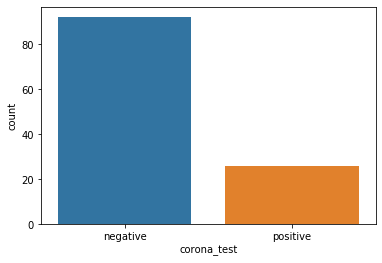

In [20]:
ax = sns.countplot(x = "corona_test", data = df4)
print(df4["corona_test"].value_counts())

pos = df4["corona_test"].value_counts()[0]
neg = df4["corona_test"].value_counts()[1]

### For checking contribution from each class in terms of percentage. 

In [21]:
neg_per = 100 *(pos / float(df4.shape[0]))
pos_per = 100 *(neg / float(df4.shape[0]))
print(neg_per)
print(pos_per)

77.96610169491525
22.033898305084744


In [22]:
# For checking distribution of values in each column or in each feature.. 

unique = df4["age"].value_counts()
print("Number of unique age values :", unique.shape[0])
# the top 10 ages that were repeated again and again
print(unique.head(10))

Number of unique age values : 47
20    6
50    6
24    5
29    5
46    5
22    5
40    5
30    4
17    4
47    4
Name: age, dtype: int64


In [23]:
# For checking distribution of values in each column or in each feature..  (checking distribution of age)

unique = df4["gender"].value_counts()
print("Number of unique age values :", unique.shape[0])
# the top 10 ages that were repeated again and again
print(unique.head(10))

Number of unique age values : 3
male           76
female         41
TRANSGENDER     1
Name: gender, dtype: int64


In [24]:
# For checking distribution of values in each column or in each feature..  (checking distribution of )
unique = df4["smoker"].value_counts()
print("Number of unique age values :", unique.shape[0])
# the top 10 ages that were repeated again and again
print(unique.head(10))

Number of unique age values : 2
no     107
yes     11
Name: smoker, dtype: int64


In [25]:
# In order to convert textural data into a numerical number for machine learning, we will use One hot encoding. 
# in pandas we have get_dummies function to convert textual data into seperate features like one hot encoder

In [26]:
df4['gender'] = LabelEncoder().fit_transform(df4['gender'])
df4['smoker'] = LabelEncoder().fit_transform(df4['smoker'])
# df4['gender']
# df4["smoker"]
df4.head()
# gender = pd.get_dummies(df4['gender'])
# smoker = pd.get_dummies(df4['smoker'], prefix='smoker')

,corona_test,age,gender,smoker,"None,","Asthma or chronic lung disease,","Disease or conditions that make it harder to cough,","Diabetes with complications,","Pregnancy,","Congestive heart failure,",...,"Fever,","chills,","or sweating,",Shortness of breath,"Loss of taste,","Loss of smell,","New or worsening cough,","Sore throat,","Body aches,",Nothing
0,negative,32,2,0,1,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
1,negative,31,2,0,1,0,0,0,0,0,...,1,1,1,1,1,1,0,0,0,0
2,negative,21,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,negative,33,2,0,0,1,0,0,0,0,...,1,1,1,1,1,1,1,0,0,0
4,negative,27,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [27]:
# so here we are merging dataframes together
# df5 = pd.concat([gender, smoker, df4], axis=1, ignore_index=False)
# df5 = df5.drop(columns = ["gender", "smoker"])
df5 = df4.replace(to_replace ="negative", 
                 value =0)
df5 = df5.replace(to_replace ="positive", 
                 value =1)

corona_positive = len(df4[df4['corona_test'] == 'positive'])
corona_negative = len(df4[df4['corona_test'] == 'negative'])
print(corona_negative)
print(corona_positive)

target_labels = df5["corona_test"] 
df5 = df5.drop(columns = ["corona_test"])
df5
# target_labels

92
26


,age,gender,smoker,"None,","Asthma or chronic lung disease,","Disease or conditions that make it harder to cough,","Diabetes with complications,","Pregnancy,","Congestive heart failure,",Extreme obesity,"Fever,","chills,","or sweating,",Shortness of breath,"Loss of taste,","Loss of smell,","New or worsening cough,","Sore throat,","Body aches,",Nothing
0,32,2,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0
1,31,2,0,1,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0
2,21,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,33,2,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0
4,27,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,50,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
114,26,2,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0
115,50,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
116,44,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0


In [28]:
# Let's try SMOTE for balancing data 
# but we will just apply smote on training data
# blc testing data will remain original, no duplication in testing data. 
# so spliting the dataset

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df5, target_labels, test_size=0.30, random_state=20, shuffle=True)

### Applying SMOTE

In [30]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=0)

X_train_smote , y_train_smote = smote.fit_sample(X_train.astype("int"), y_train.astype("int"))

print("Before Smote: ", Counter(y_train))
print("After Smote: ", Counter(y_train_smote))

# so as you can say from the results that before smoting we had only 20 samples from class 1
# and we had 74 samples from class 0 so we performed smote to make them equal. 

max_age = X_train_smote["age"].max()
X_train_smote["age"] = X_train_smote["age"] / max_age
X_test["age"] = X_test["age"] / max_age
print(max_age)

# X_test.head()
X_train_smote.head()

Before Smote:  Counter({0: 65, 1: 17})
After Smote:  Counter({0: 65, 1: 65})
67


/home/naufil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,age,gender,smoker,"None,","Asthma or chronic lung disease,","Disease or conditions that make it harder to cough,","Diabetes with complications,","Pregnancy,","Congestive heart failure,",Extreme obesity,"Fever,","chills,","or sweating,",Shortness of breath,"Loss of taste,","Loss of smell,","New or worsening cough,","Sore throat,","Body aches,",Nothing
0,0.432836,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1,0.970149,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,0.522388,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.328358,2,1,1,0,0,0,0,0,0,1,1,1,1,0,0,1,0,1,0
4,0.567164,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


# Now building the model

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Normalising train and test data
# min_max_scaler = preprocessing.MinMaxScaler()
# X_train_scaled = min_max_scaler.fit_transform(X_train_smote)
# X_test_scaled = min_max_scaler.fit_transform(X_test)


model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

In [32]:
y_test = np.array(y_test).astype("int")
print("Testing accuracy is: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
pd.crosstab(y_test, y_pred)

Testing accuracy is:  0.6666666666666666
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        27
           1       0.36      0.44      0.40         9

    accuracy                           0.67        36
   macro avg       0.58      0.59      0.58        36
weighted avg       0.69      0.67      0.68        36



col_0,0,1
row_0,,
0,20,7
1,5,4



ROC curve value is:  0.6707818930041152
Confusion matrix, without normalization
[[20  7]
 [ 5  4]]


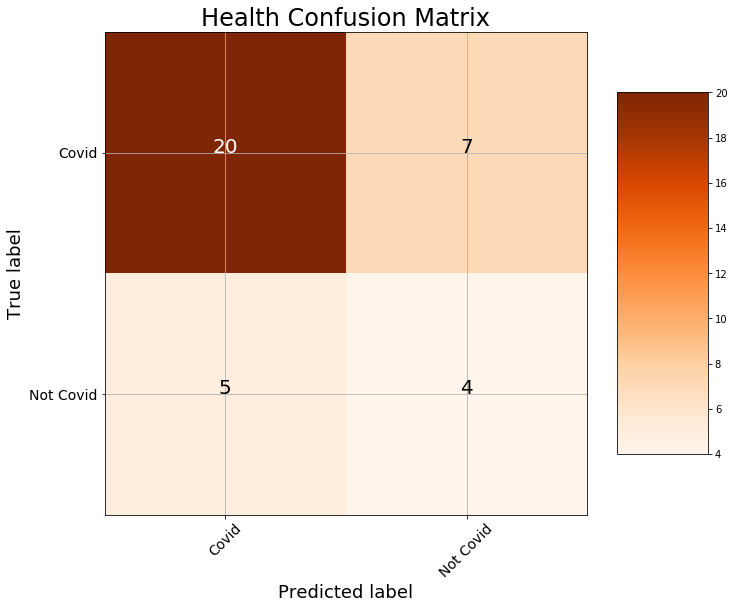

In [33]:
# Probabilities for each class
rf_probs = model.predict_proba(X_test)[:, 1]

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
print()
print("ROC curve value is: ", roc_value)

# Plotting confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Covid', 'Not Covid'],
                      title = 'Health Confusion Matrix')

plt.savefig('text-cmat.png')

In [34]:
# calculate roc curve
ns_probs = [0 for _ in range(len(y_test))]

fpr, tpr, thresholds = roc_curve(y_test, rf_probs)

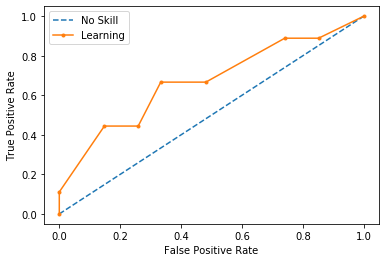

In [35]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, rf_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Learning')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()

### Now down here I m gonna use XGBoost
### along with RandomizedSearchCV for hyperparamter tuning

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df5, target_labels, test_size=0.30, random_state=40, shuffle=True)

# doing oversampling on train data
X_train_smote , y_train_smote = smote.fit_sample(X_train.astype("int"), y_train.astype("int"))
print("Before Smote: ", Counter(y_train))
print("After Smote: ", Counter(y_train_smote))

max_age = X_train_smote["age"].max()
X_train_smote["age"] = X_train_smote["age"] / max_age
X_test["age"] = X_test["age"] / max_age

# X_test.head()
X_train_smote.head()
# Normalising train and test data

# min_max_scaler = preprocessing.MinMaxScaler()
# X_train_scaled = min_max_scaler.fit_transform(X_train_smote)
# X_test_scaled = min_max_scaler.fit_transform(X_test)

Before Smote:  Counter({0: 65, 1: 17})
After Smote:  Counter({0: 65, 1: 65})


/home/naufil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,age,gender,smoker,"None,","Asthma or chronic lung disease,","Disease or conditions that make it harder to cough,","Diabetes with complications,","Pregnancy,","Congestive heart failure,",Extreme obesity,"Fever,","chills,","or sweating,",Shortness of breath,"Loss of taste,","Loss of smell,","New or worsening cough,","Sore throat,","Body aches,",Nothing
0,0.307692,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.000000,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,0.507692,2,0,1,0,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0
3,0.846154,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0
4,0.307692,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0


In [37]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

## Hyper Parameter Optimization

params = {
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}


classifier=xgboost.XGBClassifier()

random_search=RandomizedSearchCV(classifier, param_distributions=params, n_iter=5,   
                                 scoring='roc_auc', n_jobs=-1, cv=5,verbose=3)

# n_iter defines how many times your hyperparamters combination will be tested. 

random_search_model = random_search.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    4.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.5s finished


In [38]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [39]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.05,
 'gamma': 0.0,
 'colsample_bytree': 0.5}

In [40]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier, X_test, y_test ,cv=10)
print(score)
print(score.mean())

/home/naufil/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[0.5        0.75       0.25       0.5        0.75       0.75
 0.66666667 0.33333333 0.33333333 0.66666667]
0.55


In [41]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4,
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [42]:
classifier.fit(X_train_smote, y_train_smote)

y_pred = classifier.predict(X_test)

y_test = np.array(y_test).astype("int")
# y_test
print("Testing accuracy is: ", accuracy_score(y_test, y_pred))
print(print(classification_report(y_test, y_pred)))
pd.crosstab(y_test, y_pred)

Testing accuracy is:  0.75
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        27
           1       0.50      0.33      0.40         9

    accuracy                           0.75        36
   macro avg       0.65      0.61      0.62        36
weighted avg       0.73      0.75      0.73        36

None


col_0,0,1
row_0,,
0,24,3
1,6,3



ROC curve value is:  0.7551440329218108
Confusion matrix, without normalization
[[24  3]
 [ 6  3]]


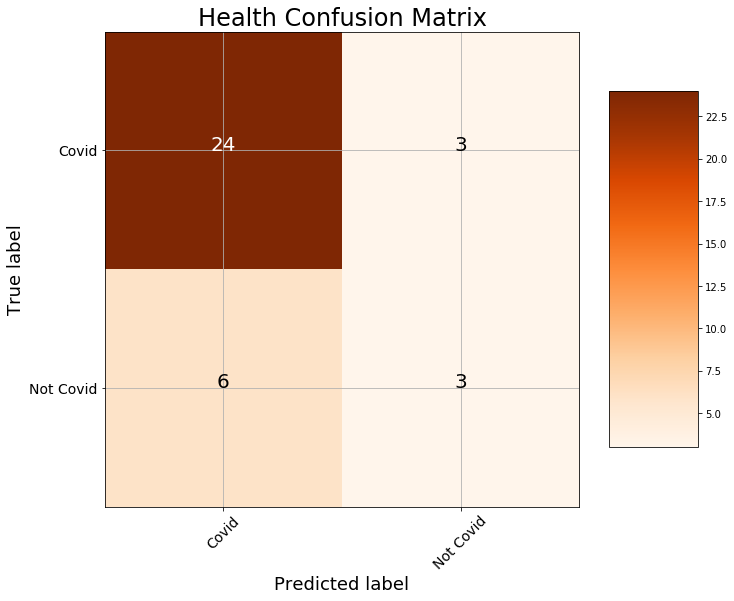

In [43]:
# Probabilities for each class
rf_probs = model.predict_proba(X_test)[:, 1]

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
print()
print("ROC curve value is: ", roc_value)

# Plotting confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Covid', 'Not Covid'],
                      title = 'Health Confusion Matrix')

plt.savefig('text-cmat2.png')

##### NOTE: you can make prediction using randomized_search_hyperparameter_model as well. 

In [44]:
y_pred = random_search_model.predict(X_test)

y_test = np.array(y_test).astype("int")
# y_test
print("Testing accuracy is: ", accuracy_score(y_test, y_pred))
print(print(classification_report(y_test, y_pred)))
pd.crosstab(y_test, y_pred)

Testing accuracy is:  0.5833333333333334
              precision    recall  f1-score   support

           0       0.75      0.67      0.71        27
           1       0.25      0.33      0.29         9

    accuracy                           0.58        36
   macro avg       0.50      0.50      0.50        36
weighted avg       0.62      0.58      0.60        36

None


col_0,0,1
row_0,,
0,18,9
1,6,3


# Spliting data into training, validation and testing.
# and trying XGBoost 

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df5, target_labels, test_size=0.30, random_state=50, shuffle=True)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=50, shuffle=True)
#split in between train, validation and test
#  cross validation instead of train_test_split

# doing over sampling
X_train_smote , y_train_smote = smote.fit_sample(X_train.astype("int"), y_train.astype("int"))
print("Before Smote: ", Counter(y_train))
print("After Smote: ", Counter(y_train_smote))

max_age = X_train_smote["age"].max()
X_train_smote["age"] = X_train_smote["age"] / max_age
X_test["age"] = X_test["age"] / max_age


# # Normalising train, val and test data
# np.random.seed(1)
# min_max_scaler = preprocessing.MinMaxScaler()
# X_train_scaled = min_max_scaler.fit_transform(X_train_smote)
# # X_val_scaled = min_max_scaler.fit_transform(X_val)
# X_test_scaled = min_max_scaler.fit_transform(X_test)

Before Smote:  Counter({0: 62, 1: 20})
After Smote:  Counter({0: 62, 1: 62})


/home/naufil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [75]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

## Hyper Parameter Optimization

params = {
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}


classifier=xgboost.XGBClassifier()

random_search=RandomizedSearchCV(classifier, param_distributions=params, n_iter=5,   
                                 scoring='roc_auc', n_jobs=-1, cv=5,verbose=3)

# n_iter defines how many times your hyperparamters combination will be tested. 

random_search_model = random_search.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    6.5s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.6s finished


In [76]:
# This shows best paramter for your model
random_search_model.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [77]:
# This is almost the same but less concise.
random_search_model.best_params_

{'min_child_weight': 1,
 'max_depth': 4,
 'learning_rate': 0.05,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [78]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.3,
              learning_rate=0.05, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [79]:
classifier.fit(X_train_smote, y_train_smote)

y_pred = classifier.predict(X_test)

y_test = np.array(y_test).astype("int")
# y_test
print("Testing accuracy is: ", accuracy_score(y_test, y_pred))
print(print(classification_report(y_test, y_pred)))
pd.crosstab(y_test, y_pred)

Testing accuracy is:  0.6666666666666666
              precision    recall  f1-score   support

           0       0.85      0.73      0.79        30
           1       0.20      0.33      0.25         6

    accuracy                           0.67        36
   macro avg       0.52      0.53      0.52        36
weighted avg       0.74      0.67      0.70        36

None


col_0,0,1
row_0,,
0,22,8
1,4,2


# Naive Bayes

In [80]:
from sklearn.naive_bayes import GaussianNB

In [81]:
clf = GaussianNB()
clf.fit(X_train_smote,y_train_smote)
print("Accuracy on test dataset: ", clf.score(X_test,y_test))

Accuracy on test dataset:  0.2222222222222222


# SVM

In [82]:
from sklearn.svm import SVC

In [83]:
# with default hyper parameter
kernel = ["linear","poly","rbf","sigmoid"]
for i in kernel:
    clf = SVC(kernel = i)
    clf.fit(X_train_smote, y_train_smote)
    pred = clf.predict(X_test)
    print("Accuracy on test dataset with",i,"kernel: ", accuracy_score(pred,y_test)) 

Accuracy on test dataset with linear kernel:  0.5
Accuracy on test dataset with poly kernel:  0.6111111111111112
Accuracy on test dataset with rbf kernel:  0.7222222222222222
Accuracy on test dataset with sigmoid kernel:  0.6111111111111112


In [84]:
# hyper parameters for SVC
kernel = ["linear","poly","rbf","sigmoid"]
degree = [2,3,4]
gammas = [0.001, 0.01, 0.1, 1, 10, 100]
# making C list  
C=[1, 10, 100, 200, 300, 1000]


In [85]:
# trying to fit the model with different hyperparameters to achieve the highest accuracy
accuracy_history = []
for i in kernel:
    for j in degree:
        for k in gammas:
            for l in C:
                clf = SVC(kernel = i,C=l, degree = j, gamma=k,random_state=0)
                clf.fit(X_train_smote,y_train_smote)
                pred = clf.predict(X_test)
                accuracy = accuracy_score(pred,y_test)
                print("Accuracy on test dataset with",i,"kernel",j,"degree",k,"gamma",l,"C: ", accuracy)
                accuracy_history.append(accuracy)

Accuracy on test dataset with linear kernel 2 degree 0.001 gamma 1 C:  0.5
Accuracy on test dataset with linear kernel 2 degree 0.001 gamma 10 C:  0.5833333333333334
Accuracy on test dataset with linear kernel 2 degree 0.001 gamma 100 C:  0.5833333333333334
Accuracy on test dataset with linear kernel 2 degree 0.001 gamma 200 C:  0.5833333333333334
Accuracy on test dataset with linear kernel 2 degree 0.001 gamma 300 C:  0.5833333333333334
Accuracy on test dataset with linear kernel 2 degree 0.001 gamma 1000 C:  0.5833333333333334
Accuracy on test dataset with linear kernel 2 degree 0.01 gamma 1 C:  0.5
Accuracy on test dataset with linear kernel 2 degree 0.01 gamma 10 C:  0.5833333333333334
Accuracy on test dataset with linear kernel 2 degree 0.01 gamma 100 C:  0.5833333333333334
Accuracy on test dataset with linear kernel 2 degree 0.01 gamma 200 C:  0.5833333333333334
Accuracy on test dataset with linear kernel 2 degree 0.01 gamma 300 C:  0.5833333333333334
Accuracy on test dataset wit

Accuracy on test dataset with linear kernel 4 degree 1 gamma 300 C:  0.5833333333333334
Accuracy on test dataset with linear kernel 4 degree 1 gamma 1000 C:  0.5833333333333334
Accuracy on test dataset with linear kernel 4 degree 10 gamma 1 C:  0.5
Accuracy on test dataset with linear kernel 4 degree 10 gamma 10 C:  0.5833333333333334
Accuracy on test dataset with linear kernel 4 degree 10 gamma 100 C:  0.5833333333333334
Accuracy on test dataset with linear kernel 4 degree 10 gamma 200 C:  0.5833333333333334
Accuracy on test dataset with linear kernel 4 degree 10 gamma 300 C:  0.5833333333333334
Accuracy on test dataset with linear kernel 4 degree 10 gamma 1000 C:  0.5833333333333334
Accuracy on test dataset with linear kernel 4 degree 100 gamma 1 C:  0.5
Accuracy on test dataset with linear kernel 4 degree 100 gamma 10 C:  0.5833333333333334
Accuracy on test dataset with linear kernel 4 degree 100 gamma 100 C:  0.5833333333333334
Accuracy on test dataset with linear kernel 4 degree 1

Accuracy on test dataset with poly kernel 4 degree 1 gamma 10 C:  0.75
Accuracy on test dataset with poly kernel 4 degree 1 gamma 100 C:  0.7222222222222222
Accuracy on test dataset with poly kernel 4 degree 1 gamma 200 C:  0.7222222222222222
Accuracy on test dataset with poly kernel 4 degree 1 gamma 300 C:  0.7222222222222222
Accuracy on test dataset with poly kernel 4 degree 1 gamma 1000 C:  0.75
Accuracy on test dataset with poly kernel 4 degree 10 gamma 1 C:  0.7222222222222222
Accuracy on test dataset with poly kernel 4 degree 10 gamma 10 C:  0.6666666666666666
Accuracy on test dataset with poly kernel 4 degree 10 gamma 100 C:  0.7222222222222222
Accuracy on test dataset with poly kernel 4 degree 10 gamma 200 C:  0.7222222222222222
Accuracy on test dataset with poly kernel 4 degree 10 gamma 300 C:  0.7222222222222222
Accuracy on test dataset with poly kernel 4 degree 10 gamma 1000 C:  0.7222222222222222
Accuracy on test dataset with poly kernel 4 degree 100 gamma 1 C:  0.694444444

Accuracy on test dataset with rbf kernel 4 degree 1 gamma 300 C:  0.7222222222222222
Accuracy on test dataset with rbf kernel 4 degree 1 gamma 1000 C:  0.6944444444444444
Accuracy on test dataset with rbf kernel 4 degree 10 gamma 1 C:  0.8055555555555556
Accuracy on test dataset with rbf kernel 4 degree 10 gamma 10 C:  0.8055555555555556
Accuracy on test dataset with rbf kernel 4 degree 10 gamma 100 C:  0.8055555555555556
Accuracy on test dataset with rbf kernel 4 degree 10 gamma 200 C:  0.8055555555555556
Accuracy on test dataset with rbf kernel 4 degree 10 gamma 300 C:  0.8055555555555556
Accuracy on test dataset with rbf kernel 4 degree 10 gamma 1000 C:  0.6944444444444444
Accuracy on test dataset with rbf kernel 4 degree 100 gamma 1 C:  0.8333333333333334
Accuracy on test dataset with rbf kernel 4 degree 100 gamma 10 C:  0.75
Accuracy on test dataset with rbf kernel 4 degree 100 gamma 100 C:  0.7222222222222222
Accuracy on test dataset with rbf kernel 4 degree 100 gamma 200 C:  0.7

Accuracy on test dataset with sigmoid kernel 4 degree 0.01 gamma 1000 C:  0.5833333333333334
Accuracy on test dataset with sigmoid kernel 4 degree 0.1 gamma 1 C:  0.6111111111111112
Accuracy on test dataset with sigmoid kernel 4 degree 0.1 gamma 10 C:  0.5277777777777778
Accuracy on test dataset with sigmoid kernel 4 degree 0.1 gamma 100 C:  0.5833333333333334
Accuracy on test dataset with sigmoid kernel 4 degree 0.1 gamma 200 C:  0.5833333333333334
Accuracy on test dataset with sigmoid kernel 4 degree 0.1 gamma 300 C:  0.5833333333333334
Accuracy on test dataset with sigmoid kernel 4 degree 0.1 gamma 1000 C:  0.5833333333333334
Accuracy on test dataset with sigmoid kernel 4 degree 1 gamma 1 C:  0.7777777777777778
Accuracy on test dataset with sigmoid kernel 4 degree 1 gamma 10 C:  0.3888888888888889
Accuracy on test dataset with sigmoid kernel 4 degree 1 gamma 100 C:  0.3888888888888889
Accuracy on test dataset with sigmoid kernel 4 degree 1 gamma 200 C:  0.3888888888888889
Accuracy o

Following hyperparameters are doing the best, concluded from above history

Accuracy on test dataset :  0.75

ROC curve value is:  0.6055555555555555
Confusion matrix, without normalization
[[22  8]
 [ 4  2]]


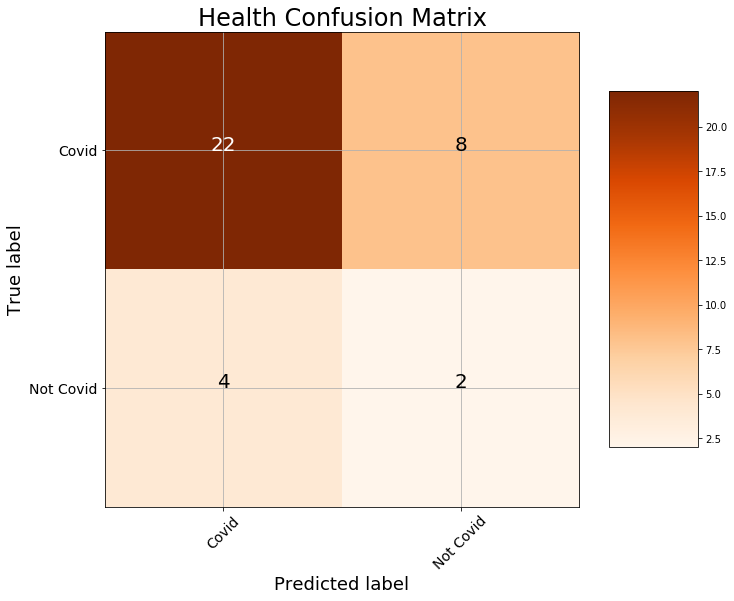

In [86]:
# X_train, X_test, y_train, y_test = train_test_split(df5, target_labels, test_size=0.30, random_state=20, shuffle=True)

# # doing oversampling on train data
# X_train_smote , y_train_smote = smote.fit_sample(X_train.astype("int"), y_train.astype("int"))
# print("Before Smote: ", Counter(y_train))
# print("After Smote: ", Counter(y_train_smote))


# # Normalising train and test data

# # min_max_scaler = preprocessing.MinMaxScaler()
# # X_train_scaled = min_max_scaler.fit_transform(X_train_smote)
# # X_test_scaled = min_max_scaler.fit_transform(X_test)
# X_train_scaled = X_train_smote
# X_test_scaled = X_test


clf = SVC(kernel = "poly", degree = 2, gamma = 10, C = 200,random_state=0, probability=True)
clf.fit(X_train_smote, y_train_smote)
pred = clf.predict(X_test)
accuracy = accuracy_score(pred,y_test)
print("Accuracy on test dataset : ", accuracy)


# Probabilities for each class
rf_probs = model.predict_proba(X_test)[:, 1]

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
print()
print("ROC curve value is: ", roc_value)

# Plotting confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Covid', 'Not Covid'],
                      title = 'Health Confusion Matrix')

plt.savefig('text-cmat2.png')

import pickle

filename = 'test.sav'
pickle.dump(clf, open(filename, 'wb'))

In [87]:
clf = SVC(kernel = "poly", degree = 4, gamma = 1, C = 100,random_state =0)
clf.fit(X_train_smote,y_train_smote)
pred = clf.predict(X_test)
accuracy = accuracy_score(pred,y_test)
print("Accuracy on test dataset : ", accuracy)

Accuracy on test dataset :  0.7222222222222222


In [88]:
clf = SVC(kernel = "poly", degree = 2, gamma = 1, C = 1,random_state = 0)
clf.fit(X_train_smote,y_train_smote)
pred = clf.predict(X_test)
accuracy = accuracy_score(pred,y_test)
print("Accuracy on test dataset : ", accuracy)

Accuracy on test dataset :  0.7222222222222222


In [89]:
clf = SVC(kernel = "poly", degree = 2, gamma = 0.1, C = 200,random_state = 0)
clf.fit(X_train_smote,y_train_smote)
pred = clf.predict(X_test)
accuracy = accuracy_score(pred,y_test)
print("Accuracy on test dataset : ", accuracy)

Accuracy on test dataset :  0.8055555555555556


# DecisionTreeClassifier

In [61]:
from sklearn import tree

In [62]:
clf = tree.DecisionTreeClassifier(min_samples_split = 5,random_state = 0)
clf.fit(X_train_smote,y_train_smote)
pred = clf.predict(X_test)
accuracy = accuracy_score(pred,y_test)
print("Accuracy on test dataset : ", accuracy)

Accuracy on test dataset :  0.75


In [63]:
# Build Models 

# Random Forest
# TODO

# Loaded the best Model (SVM)

In [73]:
# TODO
import pickle

filename = "test.sav"
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test_scaled, y_test)
pred = loaded_model.predict(X_test)
accuracy = accuracy_score(pred,y_test)
print("Accuracy on test dataset : ", accuracy)


Accuracy on test dataset :  0.8333333333333334


In [72]:
# X_test_scaled[0].shape
# hh = X_test_scaled[0][np.newaxis, ...]

# print(hh.shape)

# probs = loaded_model.predict_proba(hh)

NameError: name 'X_test_scaled' is not defined

In [ ]:
# X_test_scaled.shape

In [ ]:
# ii = np.argmax(probs)

# if ii == 0:
#     print("Corona pos")
# else:
#     print("corona neg")

# For saving the models u can either use pickel or u can use joblib

In [ ]:
# Fit the model on training set
model = LogisticRegression()
model.fit(X_train, Y_train)
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(model, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

In [ ]:
import pandas as pd
ddd = pd.read_csv('patient data all 119.csv')
fff = ddd.drop(columns=["seq_id", "patient_id", "date" , "cough_filename", "finger_filename",
                                "patient_smartphone", "breathing_filename"])

fff["medical_history"].fillna("None,", inplace = True) 
fff["smoker"].fillna("no", inplace = True) 
fff["patient_reported_symptoms"].fillna("None,", inplace = True) 
fff.head()

# Testing Text.py file

In [66]:
data = {"seq_id": "NaN",
        "patient_id": "NaN",
        "date":"NaN",
        "corona_test":"positive",
        "age":53 ,
        "gender": "male",
        "medical_history":"None,",
        "smoker": "no",
        "patient_reported_symptoms":"Fever, chills, or sweating,Shortness of breath,New or worsening cough,Sore throat,Loss of taste,Loss of smell," ,
        "cough_filename": "NaN",
        "breathing_filename":"NaN",
        "finger_filename":"NaN",
        "patient_smartphone":"NaN"}

# df = pd.DataFrame.from_records(data,index=[0])
df1 = pd.DataFrame(data,index=[0])
df1 = df1.replace('NaN',np.NaN)

# data, columns = ['seq_id', 'patient_id','date','corona_test','age','gender','medical_history','smoker','patient_reported_symptoms','cough_filename','breathing_filename','finger_filename','patient_smartphone']

df1

,seq_id,patient_id,date,corona_test,age,gender,medical_history,smoker,patient_reported_symptoms,cough_filename,breathing_filename,finger_filename,patient_smartphone
0,NaN,NaN,NaN,positive,53,male,"None,",no,"Fever, chills, or sweating,Shortness of breath...",NaN,NaN,NaN,NaN


In [70]:
import sys
sys.path.append("/home/naufil/Desktop/corona/covid/text")
import text_api

dd = text_api.predict(df1, "textual_model83.sav")
print("Posiitve percentage is: ",dd, "%age")

Posiitve percentage is:  1.927424139711792 %age


In [ ]:
# Apply Random forest classifier
# Logistic regression
# Discriminant Analysis
# Regularization in feature space
# Combine the features 
# dimensionality reduction
# zhushen@stanford.edu 